# Is Canada a Country with Consistent Job Market for Developers: A Closer Look Into Data Science Field?
## by Ayush Mahajan

> Data analysis and visualization using data from surveys conducted from 2017 to 2019 among Stackoverflow's community

## Business Understanding
> For this project I used Stackoverflow survey data from 2017 to 2019 focusing only on Canada.
The questions of interest are:
1. Among three programming languages which are mainly used in data science (Python, SQL, R) what percentage of Canadian participants worked with last year and desired to work with next year between 2017 and 2019? Did the salary changed over the years for each language?
2. Do Canadian developers with more professional coding experience and career satisfaction gain more salary?
3. Does salary increases with higher professional coding experience among Canadian developers if results are divided into male and female? How about ethnicity and organization size?

> The answers to these questions can shed some light regarding the consistency of job market in Canada.

## Data Understanding
> In order to have an hollistic understanding of the nature of data from 2017 to 2019 and any inconsistencies between them I am going to import all three data sets and their schema. Required columns for analysis will be selected and the headers and data types along with the subcategories in each column will become consistent for more accurate analysis.

In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read 2017 survey data and pass convertors function in a dictionary to surpass an error for
# row_series = df[column].apply(lambda x: x.split(';')) in language_counter function
stack_17 = pd.read_csv('stack2017.csv', converters={'HaveWorkedLanguage':str})
#pd.set_option('display.max_columns', None)
stack_17.head(1)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN


In [3]:
# number of columns and rows
stack_17.shape

(51392, 154)

In [4]:
# read 2017 schema
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', -1)
schema_17 = pd.read_csv('stack2017_schema.csv')
#schema_17

In [5]:
# write a function to draw description from schema for every column interested in
def description(df_column, schema, col, question):
    '''
    INPUT:
    df_column - column name in survey dataframe
    schema - schema with description of survey columns
    col - column heading in schema having the list of column names from survey dataframe
    question - column heading in schema having the list of column descriptions
    
    OUTPUT:
    col_desc - description of column name
    '''
    col_desc = list(schema[schema[col] == df_column][question])[0]
    return col_desc

In [6]:
# retrieve the description of columns using the description function for 2017
list_2017 = ['Country','CompanySize','EmploymentStatus','CareerSatisfaction',
            'YearsCodedJob','HaveWorkedLanguage','WantWorkLanguage',
            'Gender','Race','Salary']
list_desc = []
for i in list_2017:
    list_desc.append({i:description(i, schema_17, 'Column', 'Question')})
    
list_desc

[{'Country': 'In which country do you currently live?'},
 {'CompanySize': 'In terms of the number of employees, how large is the company or organization you work for?'},
 {'EmploymentStatus': 'Which of the following best describes your current employment status?'},
 {'CareerSatisfaction': 'Career satisfaction rating'},
 {'YearsCodedJob': 'For how many years have you coded as part of your job?'},
 {'HaveWorkedLanguage': 'Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?'},
 {'WantWorkLanguage': 'Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?'},
 {'Gender': 'Which of the following do you currently identify as?'},
 {'Race': 'Which of the following do you identify as?'},
 {'Salary': 'What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?

In [7]:
# subset selected columns from dataframe
def subset(df, funclist):
    '''
    INPUT:
    df - dataframe to draw subset from
    
    OUTPUT:
    df_sub - dataframe with selected subset of columns
    '''
    df_sub = df[funclist]
    return df_sub

In [8]:
# create 2017 subset dataframe
subset_17 = subset(stack_17, list_2017)
subset_17.head(1)

,Country,CompanySize,EmploymentStatus,CareerSatisfaction,YearsCodedJob,HaveWorkedLanguage,WantWorkLanguage,Gender,Race,Salary
0,United States,NaN,"Not employed, and not looking for work",NaN,NaN,Swift,Swift,Male,White or of European descent,NaN


In [9]:
# read 2018 data
#converters={i: str for i in range(130)}
stack_18 = pd.read_csv('stack2018.csv', converters={'LanguageWorkedWith':str})
stack_18.head(1)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy


In [10]:
# number of columns and rows
stack_18.shape

(98855, 129)

In [11]:
# read 2018 schema
schema_18 = pd.read_csv('stack2018_schema.csv')
#schema_18

In [12]:
# retrieve the description of columns using the description function for 2018
list_2018 = ['Country','CompanySize','Employment','CareerSatisfaction',
            'YearsCodingProf','LanguageWorkedWith','LanguageDesireNextYear',
            'Gender', 'RaceEthnicity','ConvertedSalary']
list_desc = []
for i in list_2018:
    list_desc.append({i:description(i, schema_18, 'Column', 'QuestionText')})
    
list_desc

[{'Country': 'In which country do you currently reside?'},
 {'CompanySize': 'Approximately how many people are employed by the company or organization you work for?'},
 {'Employment': 'Which of the following best describes your current employment status?'},
 {'CareerSatisfaction': 'Overall, how satisfied are you with your career thus far?'},
 {'YearsCodingProf': 'For how many years have you coded professionally (as a part of your work)?'},
 {'LanguageWorkedWith': 'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'},
 {'LanguageDesireNextYear': 'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked 

In [13]:
# create 2018 subset dataframe
subset_18 = subset(stack_18, list_2018)
subset_18.head(3)

,Country,CompanySize,Employment,CareerSatisfaction,YearsCodingProf,LanguageWorkedWith,LanguageDesireNextYear,Gender,RaceEthnicity,ConvertedSalary
0,Kenya,20 to 99 employees,Employed part-time,Extremely satisfied,3-5 years,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Male,Black or of African descent,NaN
1,United Kingdom,"10,000 or more employees",Employed full-time,Neither satisfied nor dissatisfied,18-20 years,JavaScript;Python;Bash/Shell,Go;Python,Male,White or of European descent,70841.0
2,United States,20 to 99 employees,Employed full-time,Moderately satisfied,6-8 years,NA,NaN,NaN,NaN,NaN


In [14]:
# read 2019 dataframe
#pd.set_option('display.max_columns', None)
#converters={i: str for i in range(86)}
stack_19 = pd.read_csv('stack2019.csv', converters={'LanguageWorkedWith':str})
stack_19.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [15]:
# number of rows and columns for 2019
stack_19.shape

(88883, 85)

In [16]:
# read 2019 schema
#pd.set_option('display.max_rows', None)
schema_19 = pd.read_csv('stack2019_schema.csv')
#schema_19

In [17]:
# retrieve the description of columns using the description function for 2019
list_2019 = ['Country','OrgSize','Employment','CareerSat',
            'YearsCodePro','LanguageWorkedWith','LanguageDesireNextYear',
            'Gender','Ethnicity','ConvertedComp']
list_desc = []
for i in list_2019:
    list_desc.append({i:description(i, schema_19, 'Column', 'QuestionText')})
list_desc

[{'Country': 'In which country do you currently reside?'},
 {'OrgSize': 'Approximately how many people are employed by the company or organization you work for?'},
 {'Employment': 'Which of the following best describes your current employment status?'},
 {'CareerSat': 'Overall, how satisfied are you with your career thus far?'},
 {'YearsCodePro': 'How many years have you coded professionally (as a part of your work)?'},
 {'LanguageWorkedWith': 'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'},
 {'LanguageDesireNextYear': 'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language an

In [18]:
# create 2019 subset dataframe
subset_19 = subset(stack_19, list_2019)
subset_19.head(3)

,Country,OrgSize,Employment,CareerSat,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,Gender,Ethnicity,ConvertedComp
0,United Kingdom,NaN,"Not employed, and not looking for work",NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,Man,NaN,NaN
1,Bosnia and Herzegovina,NaN,"Not employed, but looking for work",NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,Man,NaN,NaN
2,Thailand,100 to 499 employees,Employed full-time,Slightly satisfied,1,HTML/CSS,Elixir;HTML/CSS,Man,NaN,8820.0


In [19]:
# 2017 data types and null values
subset_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 10 columns):
Country               51392 non-null object
CompanySize           38922 non-null object
EmploymentStatus      51392 non-null object
CareerSatisfaction    42695 non-null float64
YearsCodedJob         40890 non-null object
HaveWorkedLanguage    51392 non-null object
WantWorkLanguage      33771 non-null object
Gender                35047 non-null object
Race                  33033 non-null object
Salary                12891 non-null float64
dtypes: float64(2), object(8)
memory usage: 3.9+ MB


## Data Preparation
> In this section data will be cleaned and prepared for analysis and visualization. A consistent and coherent clean master data will be developed for final analysis.

In [20]:
# print list of columns from 2019, 18, and 17 datasets
subset_list = [subset_19, subset_18, subset_17]
for i in subset_list:
    x = list(i.columns.values)
    print(x)

['Country', 'OrgSize', 'Employment', 'CareerSat', 'YearsCodePro', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Gender', 'Ethnicity', 'ConvertedComp']
['Country', 'CompanySize', 'Employment', 'CareerSatisfaction', 'YearsCodingProf', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Gender', 'RaceEthnicity', 'ConvertedSalary']
['Country', 'CompanySize', 'EmploymentStatus', 'CareerSatisfaction', 'YearsCodedJob', 'HaveWorkedLanguage', 'WantWorkLanguage', 'Gender', 'Race', 'Salary']


In [21]:
# rename 2019,2018 and 2017 columns to be consistent
subset_19 = subset_19.rename(index=str,columns={'ConvertedComp':'Salary'})
subset_18 = subset_18.rename(index=str,columns={'CompanySize':'OrgSize',
                                                'CareerSatisfaction':'CareerSat',
                                                'YearsCodingProf':'YearsCodePro',
                                                'RaceEthnicity':'Ethnicity',
                                               'ConvertedSalary':'Salary'})
subset_17 = subset_17.rename(index=str,columns={'CompanySize':'OrgSize',
                                                'EmploymentStatus':'Employment',
                                                'CareerSatisfaction':'CareerSat',
                                                'YearsCodedJob':'YearsCodePro',
                                                'HaveWorkedLanguage':'LanguageWorkedWith',
                                                'WantWorkLanguage':'LanguageDesireNextYear',
                                                'Race':'Ethnicity'})

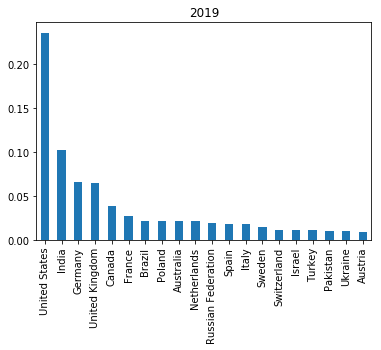

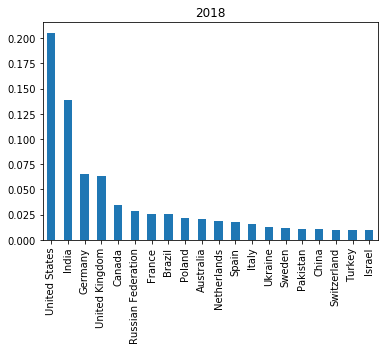

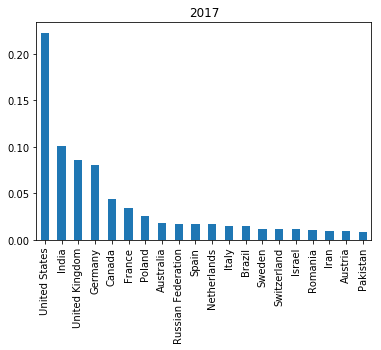

In [22]:
# define function to draw barplot
def bar_chart (df, column, title):
    '''
    INPUT:
    df - name of dataframe
    column - the column having list of countries
    
    OUTPUT:
    barchart
    '''
    country_vals = df[column].value_counts()
    (country_vals[:20]/df.shape[0]).plot(kind='bar');
    plt.title(title);

# draw barchart of number of developer per country
subset_list = [subset_19, subset_18, subset_17]
year_list = ['2019', '2018', '2017']
j=0
for i in subset_list:
    bar_chart(i, 'Country', year_list[j])
    plt.show()
    j = j+1

In [23]:
# draw the list of top 20 countries with highest number of developers participated in surveys
subset_list = [subset_19, subset_18, subset_17]
year_list = ['2019', '2018', '2017']
j=0
for i in subset_list:
    x = list(i['Country'].value_counts()[:20].index.tolist())
    print('Top 20 countries in number of developers participating in {} survey'.format(year_list[j]))
    print (x , "\n")
    j=j+1

Top 20 countries in number of developers participating in 2019 survey
['United States', 'India', 'Germany', 'United Kingdom', 'Canada', 'France', 'Brazil', 'Poland', 'Australia', 'Netherlands', 'Russian Federation', 'Spain', 'Italy', 'Sweden', 'Switzerland', 'Israel', 'Turkey', 'Pakistan', 'Ukraine', 'Austria'] 

Top 20 countries in number of developers participating in 2018 survey
['United States', 'India', 'Germany', 'United Kingdom', 'Canada', 'Russian Federation', 'France', 'Brazil', 'Poland', 'Australia', 'Netherlands', 'Spain', 'Italy', 'Ukraine', 'Sweden', 'Pakistan', 'China', 'Switzerland', 'Turkey', 'Israel'] 

Top 20 countries in number of developers participating in 2017 survey
['United States', 'India', 'United Kingdom', 'Germany', 'Canada', 'France', 'Poland', 'Australia', 'Russian Federation', 'Spain', 'Netherlands', 'Italy', 'Brazil', 'Sweden', 'Switzerland', 'Israel', 'Romania', 'Iran', 'Austria', 'Pakistan'] 



In [24]:
# write a function to take a subset of top 20 countries and aggregate others as Other
def clean_countries(df, column, top20_list):
    '''
    INPUT:
    df - dataframe
    column - column in dataframe
    top20_list - list of top 20 countries with highest number of participants
    
    OUTPUT: dataframe with top 20 countries and other countries as other in Country column
    '''
    df[column] = df[column].apply(lambda x: x if x in top20_list else (np.nan if pd.isnull(x) else 'Other'))
    return df[column].value_counts()

In [25]:
# top 20 of 2019
top20_2019 = ['United States', 'India', 'Germany', 'United Kingdom', 'Canada', 'France', 'Brazil', 'Poland',
              'Australia', 'Netherlands', 'Russian Federation', 'Spain', 'Italy', 'Sweden', 'Switzerland',
              'Israel', 'Turkey', 'Pakistan', 'Ukraine', 'Austria']
clean_countries(subset_19, 'Country', top20_2019)

Other                 22070
United States         20949
India                  9061
Germany                5866
United Kingdom         5737
Canada                 3395
France                 2391
Brazil                 1948
Poland                 1922
Australia              1903
Netherlands            1852
Russian Federation     1694
Spain                  1604
Italy                  1576
Sweden                 1274
Switzerland             978
Israel                  952
Turkey                  949
Pakistan                923
Ukraine                 868
Austria                 839
Name: Country, dtype: int64

In [26]:
# top 20 of 2018
top20_2018 = ['United States', 'India', 'Germany', 'United Kingdom', 'Canada', 'Russian Federation', 'France',
              'Brazil', 'Poland', 'Australia', 'Netherlands', 'Spain', 'Italy', 'Ukraine', 'Sweden', 'Pakistan',
              'China', 'Switzerland', 'Turkey', 'Israel']
clean_countries(subset_18, 'Country', top20_2018)

Other                 23562
United States         20309
India                 13721
Germany                6459
United Kingdom         6221
Canada                 3393
Russian Federation     2869
France                 2572
Brazil                 2505
Poland                 2122
Australia              2018
Netherlands            1841
Spain                  1769
Italy                  1535
Ukraine                1279
Sweden                 1164
Pakistan               1050
China                  1037
Switzerland            1010
Turkey                 1004
Israel                 1003
Name: Country, dtype: int64

In [27]:
# top 20 of 2018
top20_2017 = ['United States', 'India', 'United Kingdom', 'Germany', 'Canada', 'France', 'Poland', 'Australia',
              'Russian Federation', 'Spain', 'Netherlands', 'Italy', 'Brazil', 'Sweden', 'Switzerland', 'Israel',
              'Romania', 'Iran', 'Austria', 'Pakistan']
clean_countries(subset_17, 'Country', top20_2017)

Other                 12096
United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Netherlands             855
Italy                   781
Brazil                  777
Sweden                  611
Switzerland             595
Israel                  575
Romania                 561
Iran                    507
Austria                 477
Pakistan                454
Name: Country, dtype: int64

In [28]:
# function to list values in OrgSize column
subset_list = [subset_19, subset_18, subset_17]
year_list = ['2019', '2018', '2017']
def values(column):
    '''
    INPUT:
    column - The same column of all 2017, 2018, and 2019 dataframes
    
    OUTPUT: Values within the same column from all years
    '''
    j=0
    for i in subset_list:
        x = i[column].unique()
        print('{}'.format(year_list[j]))
        print(list(x),"\n")
        j=j+1
    return

# run the function
values('OrgSize')

2019
[nan, '100 to 499 employees', '10,000 or more employees', 'Just me - I am a freelancer, sole proprietor, etc.', '10 to 19 employees', '20 to 99 employees', '1,000 to 4,999 employees', '2-9 employees', '500 to 999 employees', '5,000 to 9,999 employees'] 

2018
['20 to 99 employees', '10,000 or more employees', '100 to 499 employees', '10 to 19 employees', '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees', 'Fewer than 10 employees', nan] 

2017
[nan, '20 to 99 employees', '10,000 or more employees', '10 to 19 employees', 'Fewer than 10 employees', '5,000 to 9,999 employees', '100 to 499 employees', '1,000 to 4,999 employees', '500 to 999 employees', "I don't know", 'I prefer not to answer'] 



In [29]:
# to make years consistent pool 'Just me - I am a freelancer, sole proprietor, etc.' and '2-9 employees'
# as 'Fewer than 10 employees' and overwrite in the same column
def substitute(df, column, values, target):
    '''
    INPUT:
    df - dataframe
    column - column in dataframe
    values - list of values in column to be replaced
    target - target values to substitute with older values
    
    OUTPUT:
    unique values in the column having replaced new values
    '''
    for i in values:
        df.loc[df[column] == i, column] = target
    return df[column].unique()

# run the function for 2019
substitute(subset_19, 'OrgSize',
           ['Just me - I am a freelancer, sole proprietor, etc.', '2-9 employees'], 'Fewer than 10 employees')

array([nan, '100 to 499 employees', '10,000 or more employees',
       'Fewer than 10 employees', '10 to 19 employees',
       '20 to 99 employees', '1,000 to 4,999 employees',
       '500 to 999 employees', '5,000 to 9,999 employees'], dtype=object)

In [30]:
# run the function for 2017
substitute(subset_17, 'OrgSize',
           ["I don't know", 'I prefer not to answer'], np.nan)

array([nan, '20 to 99 employees', '10,000 or more employees',
       '10 to 19 employees', 'Fewer than 10 employees',
       '5,000 to 9,999 employees', '100 to 499 employees',
       '1,000 to 4,999 employees', '500 to 999 employees'], dtype=object)

In [31]:
# list of values in Employment column
values('Employment')

2019
['Not employed, and not looking for work', 'Not employed, but looking for work', 'Employed full-time', 'Independent contractor, freelancer, or self-employed', nan, 'Employed part-time', 'Retired'] 

2018
['Employed part-time', 'Employed full-time', 'Independent contractor, freelancer, or self-employed', 'Not employed, and not looking for work', 'Not employed, but looking for work', nan, 'Retired'] 

2017
['Not employed, and not looking for work', 'Employed part-time', 'Employed full-time', 'Independent contractor, freelancer, or self-employed', 'Not employed, but looking for work', 'I prefer not to say', 'Retired'] 



In [32]:
# substitute 'I prefer not to say' in 2017 with nan
substitute(subset_17, 'Employment', ['I prefer not to say'], np.nan)

array(['Not employed, and not looking for work', 'Employed part-time',
       'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work', nan, 'Retired'], dtype=object)

In [33]:
# list of unique values in CareerSat column
values('CareerSat')

2019
[nan, 'Slightly satisfied', 'Very satisfied', 'Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied'] 

2018
['Extremely satisfied', 'Neither satisfied nor dissatisfied', 'Moderately satisfied', 'Slightly dissatisfied', 'Slightly satisfied', nan, 'Moderately dissatisfied', 'Extremely dissatisfied'] 

2017
[nan, 8.0, 6.0, 7.0, 3.0, 9.0, 5.0, 10.0, 4.0, 0.0, 2.0, 1.0] 



In [34]:
# value_counts for 2019,2018, 2017
j=0
for i in subset_list:
    print(year_list[j], "\n", i['CareerSat'].value_counts(), "\n")
    j=j+1

2019 
 Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64 

2018 
 Moderately satisfied                  27926
Extremely satisfied                   14316
Slightly satisfied                    13484
Slightly dissatisfied                  6587
Neither satisfied nor dissatisfied     6316
Moderately dissatisfied                5262
Extremely dissatisfied                 2613
Name: CareerSat, dtype: int64 

2017 
 8.0     11037
7.0      9384
9.0      5579
10.0     5408
6.0      4721
5.0      3070
4.0      1352
3.0      1046
2.0       495
0.0       392
1.0       211
Name: CareerSat, dtype: int64 



In [35]:
# substitute moderately and extremely satisfied with very satisfied in 2018 subset
substitute(subset_18, 'CareerSat', ['Moderately satisfied', 'Extremely satisfied'], 'Very satisfied')
# substitute moderately and extremely dissatisfied with very dissatisfied in 2018 subset
substitute(subset_18, 'CareerSat', ['Moderately dissatisfied', 'Extremely dissatisfied'], 'Very dissatisfied')

array(['Very satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly dissatisfied', 'Slightly satisfied', nan,
       'Very dissatisfied'], dtype=object)

In [36]:
# 0, 1, 2 as very dissatisfied in 2017 subset
substitute(subset_17, 'CareerSat', [0.0, 1.0, 2.0], 'Very dissatisfied')
# 3 and 4 as slightly dissatisfied in 2017 subset
substitute(subset_17, 'CareerSat', [3.0, 4.0], 'Slightly dissatisfied')
# 5 and 6 as Neither satisfied nor dissatisfied in 2017 subset
substitute(subset_17, 'CareerSat', [5.0, 6.0], 'Neither satisfied nor dissatisfied')
# 7 and 8 as slightly satisfied in 2017 subset
substitute(subset_17, 'CareerSat', [7.0, 8.0], 'Slightly satisfied')
# 9 and 10 as very satisfied in 2017 subset
substitute(subset_17, 'CareerSat', [9.0, 10.0], 'Very satisfied')

array([nan, 'Slightly satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly dissatisfied', 'Very satisfied', 'Very dissatisfied'],
      dtype=object)

In [37]:
# list of unique values in YearsCodePro column
values('YearsCodePro')

2019
[nan, '1', 'Less than 1 year', '9', '3', '4', '10', '8', '2', '13', '18', '5', '14', '22', '23', '19', '35', '20', '25', '7', '15', '27', '6', '48', '12', '31', '11', '17', '16', '21', '29', '30', '26', '33', '28', '37', '40', '34', '24', '39', '38', '36', '32', '41', '45', '43', 'More than 50 years', '44', '42', '46', '49', '50', '47'] 

2018
['3-5 years', '18-20 years', '6-8 years', '12-14 years', '0-2 years', '21-23 years', nan, '24-26 years', '9-11 years', '15-17 years', '27-29 years', '30 or more years'] 

2017
[nan, '20 or more years', '9 to 10 years', '10 to 11 years', '8 to 9 years', '7 to 8 years', '11 to 12 years', '15 to 16 years', '1 to 2 years', '3 to 4 years', '12 to 13 years', 'Less than a year', '5 to 6 years', '16 to 17 years', '13 to 14 years', '6 to 7 years', '2 to 3 years', '17 to 18 years', '4 to 5 years', '14 to 15 years', '18 to 19 years', '19 to 20 years'] 



In [38]:
# strip ' years' from right side of values
subset_18['YearsCodePro'] = subset_18['YearsCodePro'].replace(' years', '', regex=True)
# create a more aggregated list of values for YearsCodePro in 2018 based on 2017
subset_18['YearsCodePro'].replace(to_replace=['21-23','24-26','27-29','30 or more'],value='21 or more',inplace=True)

In [39]:
# check the values in 2018 in YearsCodePro
subset_18['YearsCodePro'].unique()

array(['3-5', '18-20', '6-8', '12-14', '0-2', '21 or more', nan, '9-11',
       '15-17'], dtype=object)

In [40]:
# create the list of values of YearsCodePro in 2019 based on 2018 data
bins_2018 = ['0-2','3-5','6-8','9-11','12-14','15-17','18-20','21 or more']
list_2019 = [['Less than 1 year','1','2'],['3','4','5'],['6','7','8'],['9','10','11'],['12','13','14'],
            ['15','16','17'],['18','19','20'],
             ['21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38',
              '39','40','41','42','43','44','45','46','47','48','49','50','More than 50 years']]
j=0
for i in bins_2018:
    substitute(subset_19, 'YearsCodePro', list_2019[j], i)
    j=j+1

In [41]:
# check the values in 2019 for YearsCodePro
subset_19.YearsCodePro.unique()

array([nan, '0-2', '9-11', '3-5', '6-8', '12-14', '18-20', '21 or more',
       '15-17'], dtype=object)

In [42]:
# create the list of values of YearsCodePro in 2017 based on 2018 data
list_2017 = [['Less than a year','1 to 2 years'],['2 to 3 years','3 to 4 years','4 to 5 years'],
            ['5 to 6 years','6 to 7 years','7 to 8 years'],['8 to 9 years','9 to 10 years','10 to 11 years'],
            ['11 to 12 years','12 to 13 years','13 to 14 years'],['14 to 15 years','15 to 16 years','16 to 17 years'],
            ['17 to 18 years','18 to 19 years','19 to 20 years'],['20 or more years']]
j=0
for i in bins_2018:
    substitute(subset_17, 'YearsCodePro', list_2017[j], i)
    j=j+1

In [43]:
# check the values in 2017 for YearsCodePro
subset_17.YearsCodePro.unique()

array([nan, '21 or more', '9-11', '6-8', '12-14', '15-17', '0-2', '3-5',
       '18-20'], dtype=object)

In [44]:
#values('LanguageWorkedWith')
#values('LanguageDesireNextYear')

In [45]:
# count the number of languages worked with in each year
def language_counter(df, column):
    '''
    INPUT:
    df - dataframe
    column - language column in dataframe
    OUTPUT:
    languages with their number of occurances
    '''
    row_series = df[column].apply(lambda x: x.split(';'))
    
    items = []
    for row in row_series:
        for item in row:
            items.append(item.strip())
    Counter(items)
    return Counter(items)

j=0
for i in subset_list:
    x = language_counter(i, 'LanguageWorkedWith')
    y = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
    print(year_list[j], "\n", y, "\n")
    j=j+1

2019 
 {'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'NA': 1314, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777} 

2018 
 {'JavaScript': 54686, 'HTML': 53628, 'CSS': 50979, 'SQL': 44670, 'Java': 35521, 'Bash/Shell': 31172, 'Python': 30359, 'C#': 26954, 'PHP': 24071, 'NA': 20521, 'C++': 19872, 'C': 18042, 'TypeScript': 13626, 'Ruby': 7911, 'Swift': 6310, 'Assembly': 5760, 'Go': 5532, 'Objective-C': 5510, 'VB.NET': 5254, 'R': 4813, 'Matlab': 4564, 'VBA': 3810, 'Kotlin': 3508, 'Scala': 3420, 'Groovy': 3373, 'Perl': 3280, 'Visual Basic 6': 3087, 'Lua': 2733, 'CoffeeScript': 2603, 'Delphi/Object Pascal': 2025, 'Haskell': 1961, 'Rust': 1

In [46]:
# clean language columns and return boolean values for 3 top programing languages for data science (python, sql, and R)
# as new columns
def clean_language(subsets, columns, programs):
    '''
    INPUT:
    subsets - list of subset dataframes
    columns - columns to use for creating binary columns
    programs - list of languages to draw from the columns
    OUTPUT:
    '''
    for y in subsets:
        for z in columns:
            for x in programs:
                y[x+'_'+z[8:-4]] = np.where(y[z].str.contains(x), 1, 0)
            y.drop(z, axis = 1, inplace = True)
    return

In [47]:
# use clean_language function
subset_19_copy = subset_19.copy()
subset_18_copy = subset_18.copy()
subset_17_copy = subset_17.copy()
subset_list_copy = [subset_19_copy, subset_18_copy, subset_17_copy]

#subset_list = [subset_19, subset_18, subset_17]
column_list = ['LanguageWorkedWith', 'LanguageDesireNextYear']
language_list = ['Python', 'SQL', 'R']
clean_language(subsets = subset_list_copy, columns = column_list, programs = language_list)

In [48]:
# test code
subset_19_copy.head(3)

,Country,OrgSize,Employment,CareerSat,YearsCodePro,Gender,Ethnicity,Salary,Python_Worked,SQL_Worked,R_Worked,Python_DesireNext,SQL_DesireNext,R_DesireNext
0,United Kingdom,NaN,"Not employed, and not looking for work",NaN,NaN,Man,NaN,NaN,1,0,0,1,1,0
1,Other,NaN,"Not employed, but looking for work",NaN,NaN,Man,NaN,NaN,1,0,0,0,1,0
2,Other,100 to 499 employees,Employed full-time,Slightly satisfied,0-2,Man,NaN,8820.0,0,0,0,0,0,0


In [49]:
# test code
subset_18_copy.head(3)

,Country,OrgSize,Employment,CareerSat,YearsCodePro,Gender,Ethnicity,Salary,Python_Worked,SQL_Worked,R_Worked,Python_DesireNext,SQL_DesireNext,R_DesireNext
0,Other,20 to 99 employees,Employed part-time,Very satisfied,3-5,Male,Black or of African descent,NaN,1,0,0,1,0,0
1,United Kingdom,"10,000 or more employees",Employed full-time,Neither satisfied nor dissatisfied,18-20,Male,White or of European descent,70841.0,1,0,0,1,0,0
2,United States,20 to 99 employees,Employed full-time,Very satisfied,6-8,NaN,NaN,NaN,0,0,0,1,1,1


In [50]:
# test code
subset_17_copy.head(3)

,Country,OrgSize,Employment,CareerSat,YearsCodePro,Gender,Ethnicity,Salary,Python_Worked,SQL_Worked,R_Worked,Python_DesireNext,SQL_DesireNext,R_DesireNext
0,United States,NaN,"Not employed, and not looking for work",NaN,NaN,Male,White or of European descent,NaN,0,0,0,0,0,0
1,United Kingdom,20 to 99 employees,Employed part-time,NaN,NaN,Male,White or of European descent,NaN,1,1,1,1,1,1
2,United Kingdom,"10,000 or more employees",Employed full-time,Slightly satisfied,21 or more,Male,White or of European descent,113750.0,1,0,0,1,0,1


In [51]:
# list of values in gender column for 2019, 2018, 2017
values('Gender')

2019
['Man', nan, 'Woman', 'Non-binary, genderqueer, or gender non-conforming', 'Woman;Non-binary, genderqueer, or gender non-conforming', 'Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Woman;Man', 'Man;Non-binary, genderqueer, or gender non-conforming'] 

2018
['Male', nan, 'Female', 'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female;Male', 'Male;Non-binary, genderqueer, or gender non-conforming', 'Non-binary, genderqueer, or gender non-conforming', 'Transgender', 'Female;Transgender', 'Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female;Non-binary, genderqueer, or gender non-conforming', 'Female;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Male;Transgender', 'Female;Male;Transgender', 'Female;Male;Non-binary, genderqueer, or gender non-conforming', 'Male;Transgender;Non-binary, genderqueer, or gender non-conforming'] 

2017
['Male', nan, 'Female', 'Gender non-conforming', 'Other', 'Male; Gender

In [52]:
# re-categorize Gender column into Male, Female, and Other for 2019, 2018, 2017
subset_19_copy['Gender'] = subset_19_copy['Gender'].apply(
    lambda x: 'Male' if x=='Man' else ('Female' if x=='Woman' else (np.nan if pd.isnull(x) else 'Other')))

subset_18_copy['Gender'] = subset_18_copy['Gender'].apply(
    lambda x: 'Male' if x=='Male' else ('Female' if x=='Female' else (np.nan if pd.isnull(x) else 'Other')))

subset_17_copy['Gender'] = subset_17_copy['Gender'].apply(
    lambda x: 'Male' if x=='Male' else ('Female' if x=='Female' else (np.nan if pd.isnull(x) else 'Other')))

In [53]:
# list of values in ethnicity column for 2019, 2018, 2017
#subset_19_copy['Ethnicity'].value_counts()
# create an ethnicity list and re-categorize ethnicities
ethnicity_list = ['White or of European descent', 'South Asian', 'East Asian',
                  'Hispanic or Latino/Latina', 'Middle Eastern', 'Black or of African descent']
for i in subset_list_copy:
    i['Ethnicity'] = i['Ethnicity'].apply(lambda x: x if x in ethnicity_list else (np.nan if pd.isnull(x) else 'Other'))

In [54]:
# add year column
subset_19_copy['Year'] = '2019'
subset_18_copy['Year'] = '2018'
subset_17_copy['Year'] = '2017'

In [55]:
# append all three data frames into one clean dataset
clean_subset = subset_19_copy.append([subset_18_copy, subset_17_copy], ignore_index=True)
clean_subset.head()

,Country,OrgSize,Employment,CareerSat,YearsCodePro,Gender,Ethnicity,Salary,Python_Worked,SQL_Worked,R_Worked,Python_DesireNext,SQL_DesireNext,R_DesireNext,Year
0,United Kingdom,NaN,"Not employed, and not looking for work",NaN,NaN,Male,NaN,NaN,1,0,0,1,1,0,2019
1,Other,NaN,"Not employed, but looking for work",NaN,NaN,Male,NaN,NaN,1,0,0,0,1,0,2019
2,Other,100 to 499 employees,Employed full-time,Slightly satisfied,0-2,Male,NaN,8820.0,0,0,0,0,0,0,2019
3,United States,100 to 499 employees,Employed full-time,Very satisfied,0-2,Male,White or of European descent,61000.0,1,1,0,0,1,0,2019
4,Ukraine,"10,000 or more employees",Employed full-time,Very dissatisfied,9-11,Male,Other,NaN,1,1,0,0,1,0,2019


In [56]:
# basic info from the clean dataset
clean_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239130 entries, 0 to 239129
Data columns (total 15 columns):
Country              238586 non-null object
OrgSize              180694 non-null object
Employment           232808 non-null object
CareerSat            192046 non-null object
YearsCodePro         193124 non-null object
Gender               184922 non-null object
Ethnicity            167174 non-null object
Salary               116416 non-null float64
Python_Worked        239130 non-null int32
SQL_Worked           239130 non-null int32
R_Worked             239130 non-null int32
Python_DesireNext    239130 non-null int32
SQL_DesireNext       239130 non-null int32
R_DesireNext         239130 non-null int32
Year                 239130 non-null object
dtypes: float64(1), int32(6), object(8)
memory usage: 21.9+ MB


In [57]:
# I'm interested in making my analysis more targeted and focused on Canada.
clean_canada = clean_subset.loc[clean_subset['Country'] == 'Canada']
clean_canada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9021 entries, 5 to 239127
Data columns (total 15 columns):
Country              9021 non-null object
OrgSize              6892 non-null object
Employment           8857 non-null object
CareerSat            7389 non-null object
YearsCodePro         7429 non-null object
Gender               7361 non-null object
Ethnicity            6978 non-null object
Salary               4907 non-null float64
Python_Worked        9021 non-null int32
SQL_Worked           9021 non-null int32
R_Worked             9021 non-null int32
Python_DesireNext    9021 non-null int32
SQL_DesireNext       9021 non-null int32
R_DesireNext         9021 non-null int32
Year                 9021 non-null object
dtypes: float64(1), int32(6), object(8)
memory usage: 916.2+ KB


## Results Evaluation
> Now that I have cleaned the data and compiled all three years into one with only data from Canada, I can start visualizing data with respect to the three main questions.

#### 1. Which programming languages among python, sql, and R lead to higher salary in Canada? Is there any change in salary from 2017 to 2019? What percentage of Canadian participants have worked with each of these languages and desire to wotk with for next year?

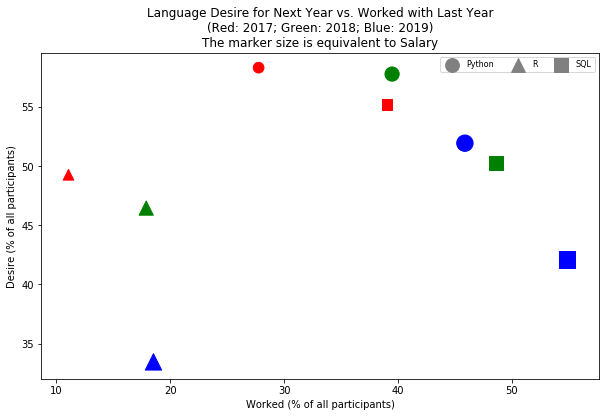

In [70]:
# Draw scatter plot of average value for percentage of participants worked with languages vs desire for
canada_copy = clean_canada.copy()

plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
a = plt.scatter(canada_copy.groupby('Year').mean().Python_Worked*100, canada_copy.groupby('Year').mean().Python_DesireNext*100,
           canada_copy.groupby('Year').mean().Salary/500, c = ['red','green','blue'], marker = "o");
b = plt.scatter(canada_copy.groupby('Year').mean().R_Worked*100, canada_copy.groupby('Year').mean().R_DesireNext*100,
           canada_copy.groupby('Year').mean().Salary/500, c = ['red','green','blue'], marker = "^");
c = plt.scatter(canada_copy.groupby('Year').mean().SQL_Worked*100, canada_copy.groupby('Year').mean().SQL_DesireNext*100,
           canada_copy.groupby('Year').mean().Salary/500, c = ['red','green','blue'], marker = "s");
plt.legend((a,b,c),('Python','R','SQL'),scatterpoints=1,loc='upper right',fontsize=8,ncol=3, bbox_to_anchor=(1, 1))
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('grey')
leg.legendHandles[1].set_color('grey')
leg.legendHandles[2].set_color('grey')

plt.title('Language Desire for Next Year vs. Worked with Last Year\n(Red: 2017; Green: 2018; Blue: 2019)\nThe marker size is equivalent to Salary')
plt.xlabel('Worked (% of all participants)')
plt.ylabel('Desire (% of all participants)');

#### 2. Are Canadian developers with more experience and career satisfaction gain more salary?

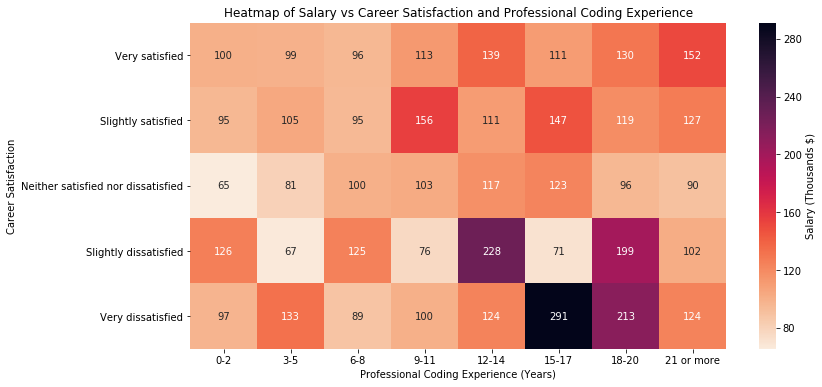

In [107]:
# Draw heatmap of salary vs career satisfaction and professional coding experience
a = ['Very satisfied','Slightly satisfied', 'Neither satisfied nor dissatisfied','Slightly dissatisfied', 'Very dissatisfied']
b = ['0-2','3-5','6-8','9-11','12-14','15-17','18-20','21 or more']

canada_copy['CareerSat'] = canada_copy['CareerSat'].astype('category', categories=a, ordered=True)
canada_copy['YearsCodePro'] = canada_copy['YearsCodePro'].astype('category', categories=b, ordered=True)
plt.figure(figsize=[12,6])

cat = canada_copy.groupby(['YearsCodePro', 'CareerSat']).mean()['Salary']/1000
cat = cat.reset_index(name = 'Salary')
cat = cat.pivot(index = 'CareerSat', columns = 'YearsCodePro',
                            values = 'Salary')

cmap = sb.cm.rocket_r
sb.heatmap(cat, annot = True, fmt = '.0f', cmap = cmap,
           cbar_kws = {'label' : 'Salary (Thousands $)'});
plt.title('Heatmap of Salary vs Career Satisfaction and Professional Coding Experience')
plt.xlabel('Professional Coding Experience (Years)')
plt.ylabel('Career Satisfaction');

In [121]:
# Look at the number of participants in categories of career satisfaction
canada_copy.CareerSat.value_counts()

Very satisfied                        3545
Slightly satisfied                    2298
Neither satisfied nor dissatisfied     690
Slightly dissatisfied                  484
Very dissatisfied                      372
Name: CareerSat, dtype: int64

#### 3. Does salary increases with higher professional coding experience among Canadian developers? Is there any difference in salary between male and female developers? Does organization size have any effect on salary? How about ethnicity?

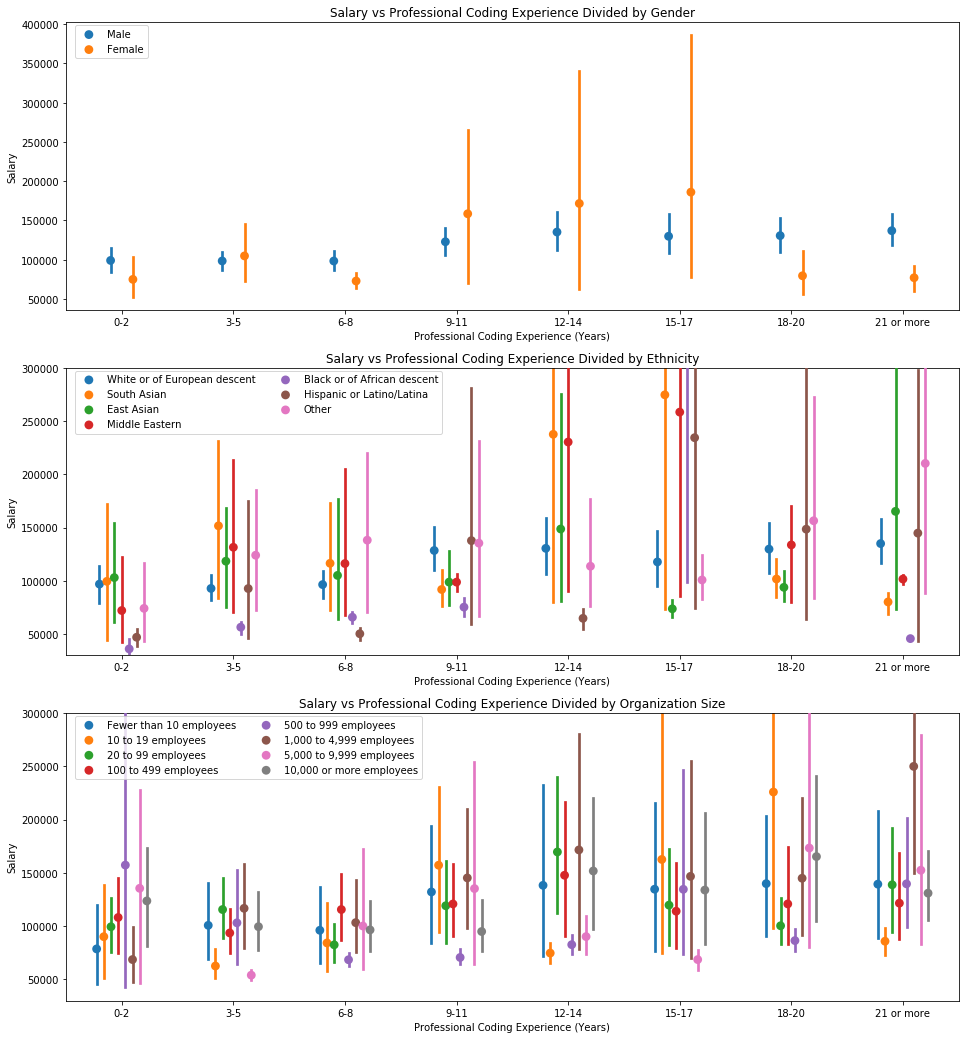

In [120]:
# Draw point plot of salary vs professional coding experience and demographics (gender and ethnicity)

# putting values for income range in order
canada_copy1 = canada_copy.copy()
canada_copy1 = canada_copy1[canada_copy1.Gender != 'Other']

org_order = ['Fewer than 10 employees','10 to 19 employees','20 to 99 employees','100 to 499 employees',
            '500 to 999 employees','1,000 to 4,999 employees','5,000 to 9,999 employees','10,000 or more employees']
ethni_order = ['White or of European descent', 'South Asian', 'East Asian',
               'Middle Eastern', 'Black or of African descent', 'Hispanic or Latino/Latina', 'Other']
exprience_orders = ['0-2','3-5','6-8','9-11','12-14','15-17','18-20','21 or more']
exporders = pd.api.types.CategoricalDtype(ordered = True, categories = exprience_orders)
orgorders = pd.api.types.CategoricalDtype(ordered = True, categories = org_order)
ethniorders = pd.api.types.CategoricalDtype(ordered = True, categories = ethni_order)
canada_copy1['YearsCodePro'] = canada_copy['YearsCodePro'].astype(exporders)
canada_copy1['Ethnicity'] = canada_copy['Ethnicity'].astype(ethniorders)
canada_copy1['OrgSize'] = canada_copy['OrgSize'].astype(orgorders)

plt.figure(figsize=[16,18])
plt.subplot(3,1,1)
sb.pointplot(data = canada_copy1, x = 'YearsCodePro', y = 'Salary', hue = 'Gender',
                  dodge = 0.2, linestyles = "")
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left',
           ncol=1, borderaxespad=0.)
plt.xticks(rotation=0);
plt.title('Salary vs Professional Coding Experience Divided by Gender')
plt.xlabel('Professional Coding Experience (Years)')
plt.ylabel('Salary');

plt.subplot(3,1,2)
sb.pointplot(data = canada_copy1, x = 'YearsCodePro', y = 'Salary', hue = 'Ethnicity',
                  dodge = 0.4, linestyles = "")
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left',
           ncol=2, borderaxespad=0.)
plt.xticks(rotation=0)
axes = plt.gca()
axes.set_ylim([30000,300000]);
plt.title('Salary vs Professional Coding Experience Divided by Ethnicity')
plt.xlabel('Professional Coding Experience (Years)')
plt.ylabel('Salary');

plt.subplot(3,1,3)
sb.pointplot(data = canada_copy1, x = 'YearsCodePro', y = 'Salary', hue = 'OrgSize',
                  dodge = 0.45, linestyles = "")
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left',
           ncol=2, borderaxespad=0.)
plt.xticks(rotation=0)
axes = plt.gca()
axes.set_ylim([30000,300000]);
plt.title('Salary vs Professional Coding Experience Divided by Organization Size')
plt.xlabel('Professional Coding Experience (Years)')
plt.ylabel('Salary');

### Results and Conclusion
> 1. Less than 20% of participants have worked with R while this number is above 27% and 39% for Python and SQL, respectively. The usage of all three languages has increased from 2016 to 2018 (the question is relevant to the previous year) but the desire to work with each language has dropped from 2018 to 2020. R seems to have lost its popularity the most from 2018 to 2019 with drop in desire from 44% to 36% and less than 1% increase in usage. The salary has increased consistently among all languages from 2017 to 2019. It can be concluded that programming language shouldn't have strong impact on the level of salary but seemingly more developers work with Python and SQL compared to R and the desire to work with these languages is also higher. SQL looks to be the most popular language and R to be the least popular.
2. On average, satisfied developers mostly earn between 100 and 150 thousand dollars annually while dissatisfied developers show high variable salary earnings. Exprience doesn't seem to have effect on salary for dissatisied developers meaning that more experience doesn't lead to higher salary. On the other hand, satisfied developers generally earn higher salary with more experience. The higher variability in salary levels among disatisfied developers may arise from the small sample size of these groups but yet this result can be indicative of two groups of workplaces in Canada. The first are having satisfied employees who pay them according to their experience. These workplaces are very well organized with better culture of employment which lead to higher satisfaction of employees while others with dissatisfied employees don't pay them accordingly and would have unorganized working environment. Career satisfaction is not only relevant to salary but also to other factors such as work environment and culture.
3. On average, male developers with experience up to 8 years earn more than female developer. On the other hand, female developer with experience between 9 and 17 years earn higher and again male developers earn higher with  more than 18 years of experience. Due to other confounding factors, the variability in ethnicity and organization size results was high. An observation that can be made here is the slight increase in salary with higher experience for white or european decent developers.
> Note: It is important to remember that these are self-reported data and there is chance of error and bias in the results. The high variability in the results from organization size and ethnicity would be as a result of this.